In [4]:
# read input data, which is a txt file
# each line is a tweet string, which is a json string
# I want to read the data into a pandas dataframe with json keys as columns

data_path = 'data/tweets_#superbowl.txt'

import pandas as pd
import json

# read the data into a list
data = []
with open(data_path, 'r') as f:
    for line in f:
        data.append(json.loads(line))



In [5]:
# convert the list into a pandas dataframe
df = pd.DataFrame(data)
df.head()

,firstpost_date,title,url,tweet,author,original_author,citation_date,metrics,highlight,type,citation_url
0,1419883838,At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,http://twitter.com/HawksNationYes/status/54965...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421468497,"{'acceleration': 0, 'ranking_score': 3.2292066...",At http://t.co/Vd0RWOeAed -- #Seahawks #12thMA...,retweet:native,http://twitter.com/BeccaDelgado67/status/55630...
1,1420343180,You been 12ed pass it on #SeahawkNation #LOB #...,http://twitter.com/brygarza/status/55158539355...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421467579,"{'acceleration': 0, 'ranking_score': 4.0334744...",You been 12ed pass it on #SeahawkNation #LOB #...,retweet:native,http://twitter.com/BeccaDelgado67/status/55630...
2,1420354386,27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,http://twitter.com/gatinhodakaty02/status/5516...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://abs.twimg.com/sticky/de...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421266957,"{'acceleration': 0, 'ranking_score': 6.9444513...",27 days to the SuperBowl 🏈🏈\n#Katyperry #KatyC...,retweet:native,http://twitter.com/waltskelliepic/status/55545...
3,1420662396,Check out the cool event that #budlight has p...,http://twitter.com/BlinkEventsDSM/status/55292...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421261298,"{'acceleration': 0, 'ranking_score': 6.6606402...",Check out the cool event that #budlight has p...,retweet:native,http://twitter.com/EventMarketer/status/555436...
4,1420998900,Lenny Kravitz acompañará a Katy Perry en el #H...,http://twitter.com/KatyCat_Prism_/status/55433...,"{'contributors': None, 'truncated': False, 'te...",{'author_img': 'http://pbs.twimg.com/profile_i...,{'author_img': 'http://pbs.twimg.com/profile_i...,1421316031,"{'acceleration': 0, 'ranking_score': 3.8561826...",Lenny Kravitz acompañará a Katy Perry en el #H...,retweet:native,http://twitter.com/cqr111/status/5556658254543...


In [6]:
# combine the operations above into a function with parameters for the data path 

import pandas as pd
import json

def process_data(data_path):
    # read input data, which is a txt file
    # each line is a tweet string, which is a json string
    # I want to read the data into a pandas dataframe with json keys as columns

    data = []
    with open(data_path, 'r', encoding='utf-8', errors='ignore') as f:
        for line in f:
            data.append(json.loads(line))

    df = pd.DataFrame(data)
    # df.head()
    # convert firstpost_data and citation_date from unix timestamp to datetime 
    df['firstpost_date'] = pd.to_datetime(df['firstpost_date'], unit='s')
    df['citation_date'] = pd.to_datetime(df['citation_date'], unit='s')


    # for 'tweet', 'author', 'original_author' and 'metrics', they are nested json objects
    # I will extract the keys of these objects as columns

    # extract the keys of 'tweet' object, asume all tweets have the same keys
    tweet_keys = df['tweet'][0].keys()
    for key in tweet_keys:
        df['tweet_'+key] = df['tweet'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'author' object, asume all tweets have the same keys
    author_keys = df['author'][0].keys()
    for key in author_keys:
        df['author_'+key] = df['author'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'original_author' object, asume all tweets have the same keys
    original_author_keys = df['original_author'][0].keys()
    for key in original_author_keys:
        df['original_author_'+key] = df['original_author'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'metrics' object, asume all tweets have the same keys
    metrics_keys = df['metrics'][0].keys()
    for key in metrics_keys:
        df['metrics_'+key] = df['metrics'].apply(lambda x: x[key] if key in x else None)

    # extract the keys of 'metrics_citations' object, assume all tweets have the same keys
    metrics_citations_keys = df['metrics_citations'][0].keys()
    for key in metrics_citations_keys:
        df['metrics_citations_'+key] = df['metrics_citations'].apply(lambda x: x[key] if key in x else None)


    return df

In [2]:
# combine the calculations above into a function with df as parameter
import matplotlib.pyplot as plt

def calculate_statistics(df):
    # calculate average number of tweets per hour
    df['hour'] = df['firstpost_date'].dt.hour
    df['date'] = df['firstpost_date'].dt.date
    df['hourly_count'] = df.groupby(['date', 'hour'])['tweet_id'].transform('count')
    print('Average number of tweets per hour: ', df['hourly_count'].mean())

    # Average number of followers of users posting the tweets per tweet.
    # To make it simple we average over the number of tweets; 
    # if a users posted twice, we count the user and the user’s followers twice as well)
    df['author_followers'] = df['author_followers'].fillna(0)
    df['author_followers'] = df['author_followers'].astype(int)
    print('Average number of followers of users posting the tweets per tweet: ', df['author_followers'].mean())

    # Count the average number of retweets per tweet using metrics_citations_total
    df['metrics_citations_total'] = df['metrics_citations_total'].fillna(0)
    df['metrics_citations_total'] = df['metrics_citations_total'].astype(int)
    print('Average number of retweets per tweet: ', df['metrics_citations_total'].mean())

    # Plot “number of tweets in hour” over time for  (a bar plot with 1-hour bins)
    # Create a figure with a specific size
    plt.figure(figsize=(15, 6))
    # Group by date and hour, count tweets in each group    
    # Group by date and hour, count the tweets, and reset index to create a dataframe
    hourly_tweets = df.groupby(['date', 'hour'])['tweet_id'].count().reset_index(name='count')
    
    # Create a datetime column by combining date and hour
    hourly_tweets['datetime'] = hourly_tweets.apply(lambda x: pd.Timestamp(x['date']) + pd.Timedelta(hours=x['hour']), axis=1)
    
    # Sort by datetime
    hourly_tweets = hourly_tweets.sort_values('datetime')
    
    # Plot the bar chart
    plt.bar(hourly_tweets['datetime'], hourly_tweets['count'], width=0.03)
    
    # Add labels and title
    plt.xlabel('Date and Hour')
    plt.ylabel('Number of Tweets')
    plt.title('Number of Tweets per Hour Over Time')
    
    # Format x-axis to show dates nicely
    plt.xticks(rotation=45)
    
    # Adjust layout
    plt.tight_layout()
    
    # Show the plot
    plt.show()

    return df


Processing file:  tweets_#nfl.txt
Average number of tweets per hour:  1978.763670383054
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254


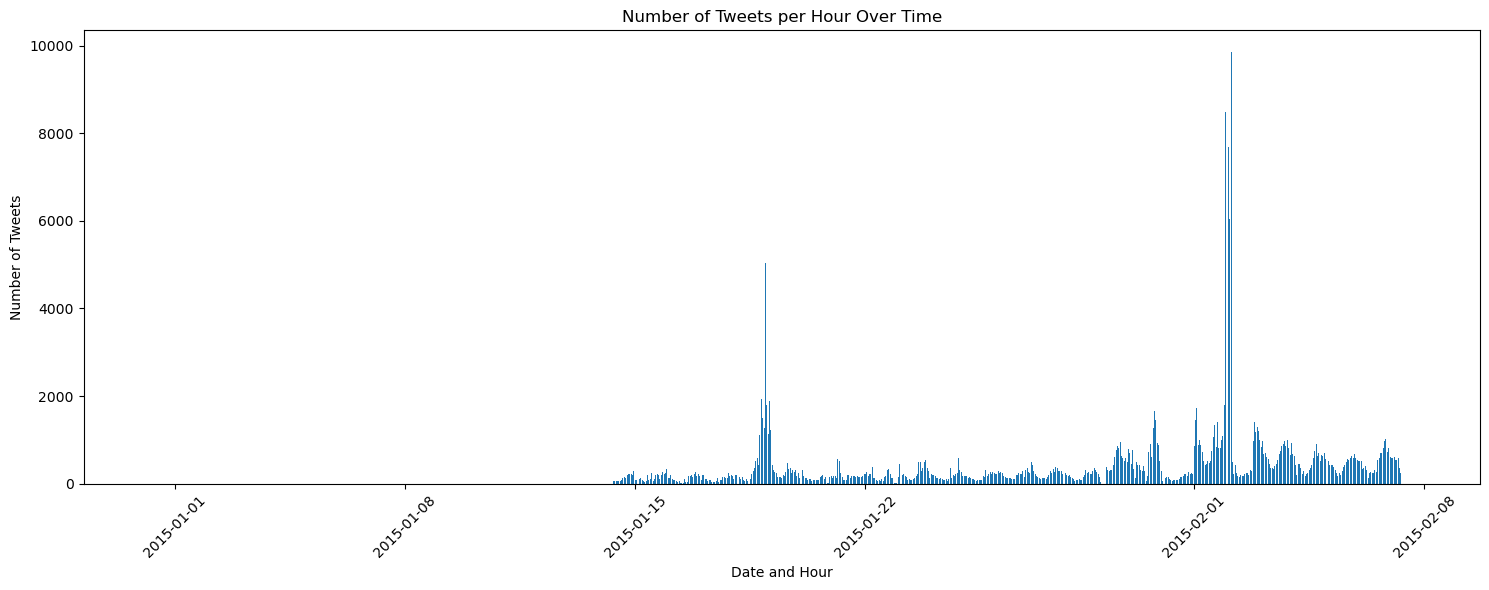

Processing file:  tweets_#superbowl.txt
Average number of tweets per hour:  127827.87722079101
Average number of followers of users posting the tweets per tweet:  8814.96799424623
Average number of retweets per tweet:  2.3911895819207736


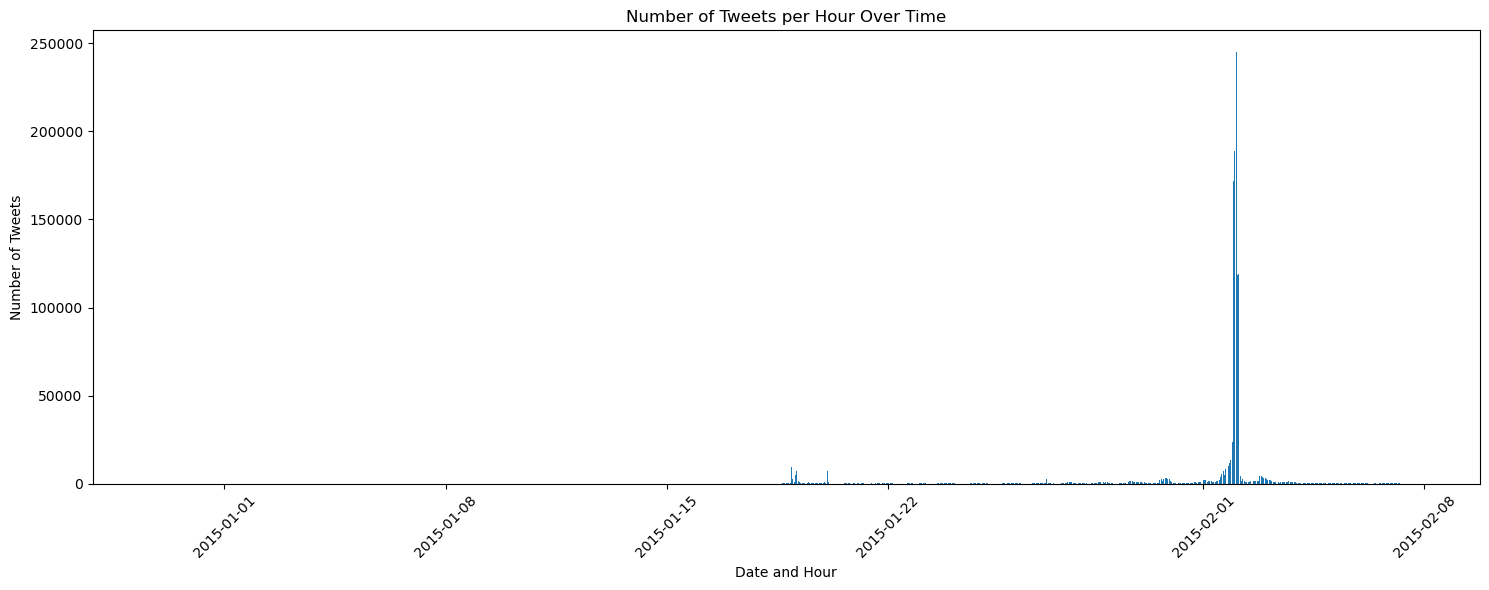

Processing file:  tweets_#sb49.txt
Average number of tweets per hour:  66125.1947962009
Average number of followers of users posting the tweets per tweet:  10374.160292019487
Average number of retweets per tweet:  2.52713444111402


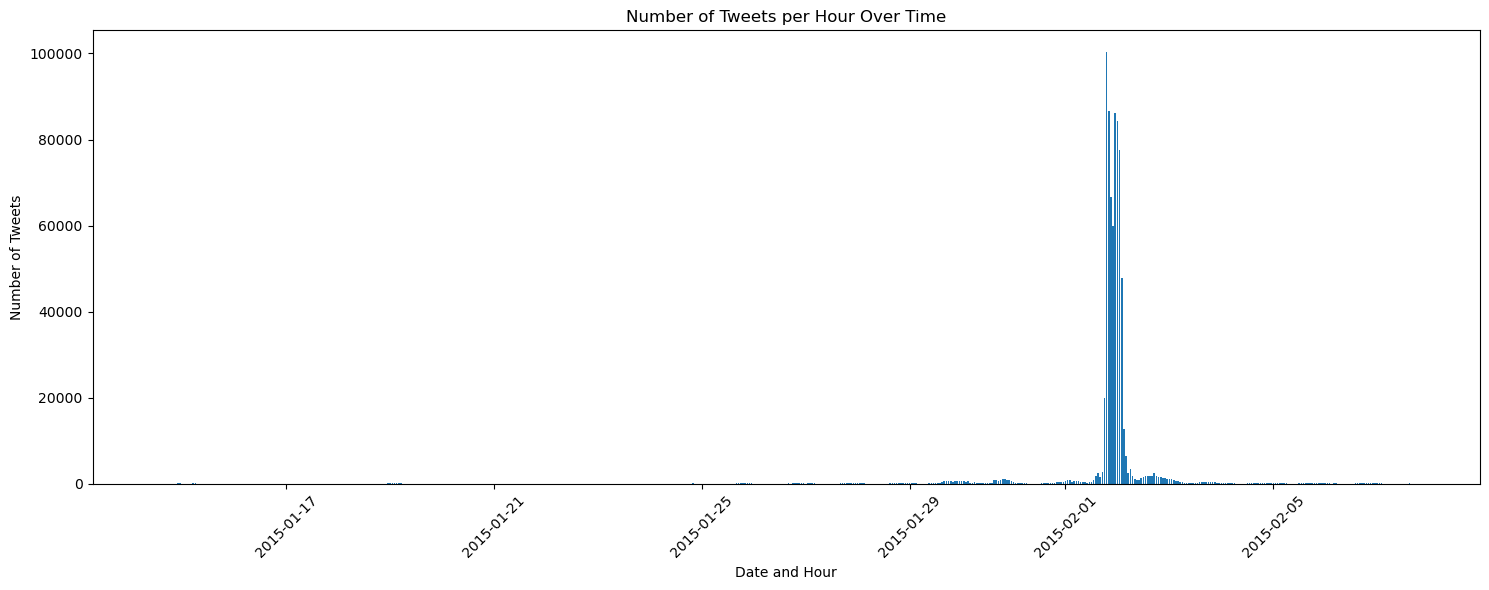

Processing file:  tweets_#patriots.txt
Average number of tweets per hour:  21695.875963696693
Average number of followers of users posting the tweets per tweet:  3280.4635616550277
Average number of retweets per tweet:  1.7852871288476946


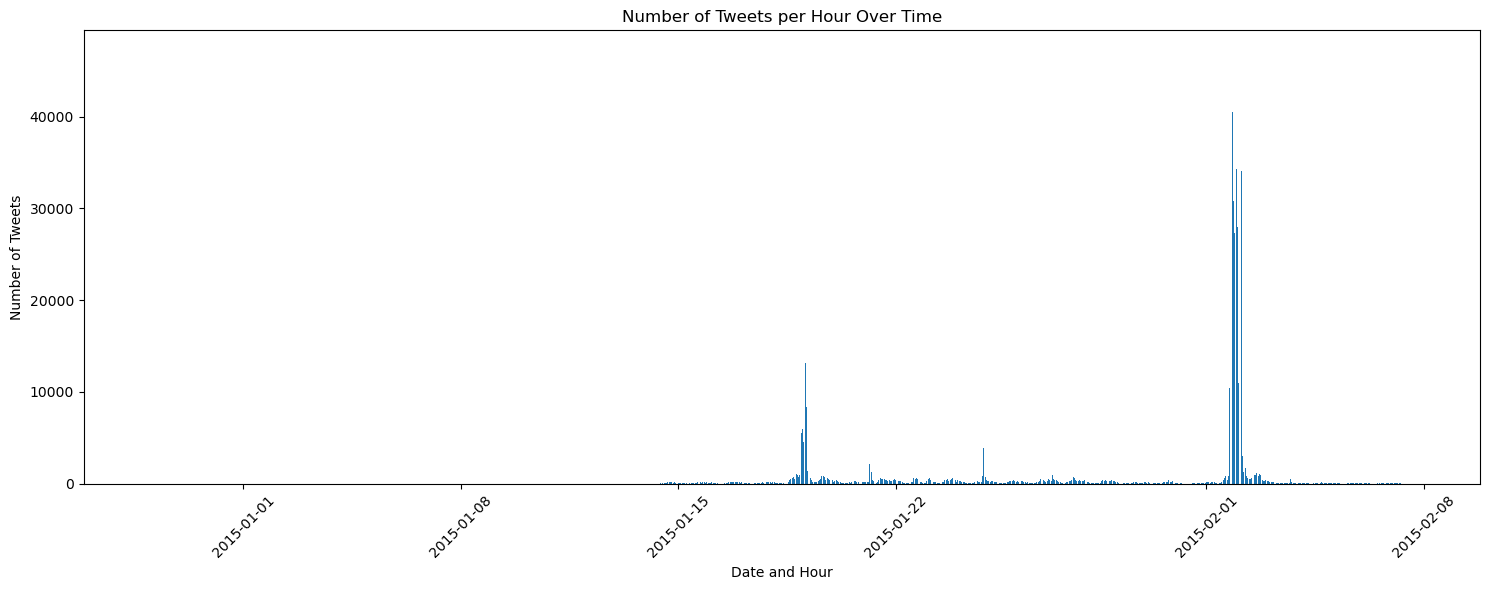

Processing file:  tweets_#gohawks.txt
Average number of tweets per hour:  5249.860313856269
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877


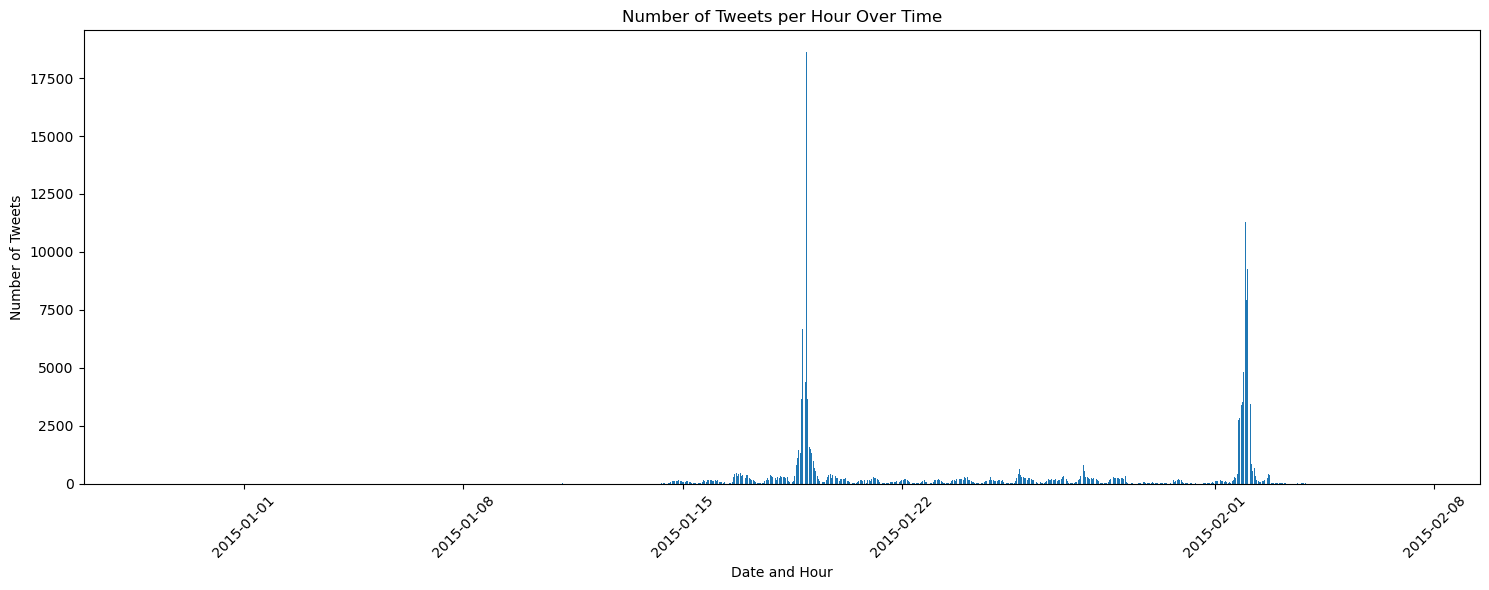

Processing file:  tweets_#gopatriots.txt
Average number of tweets per hour:  1869.8754200161627
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078


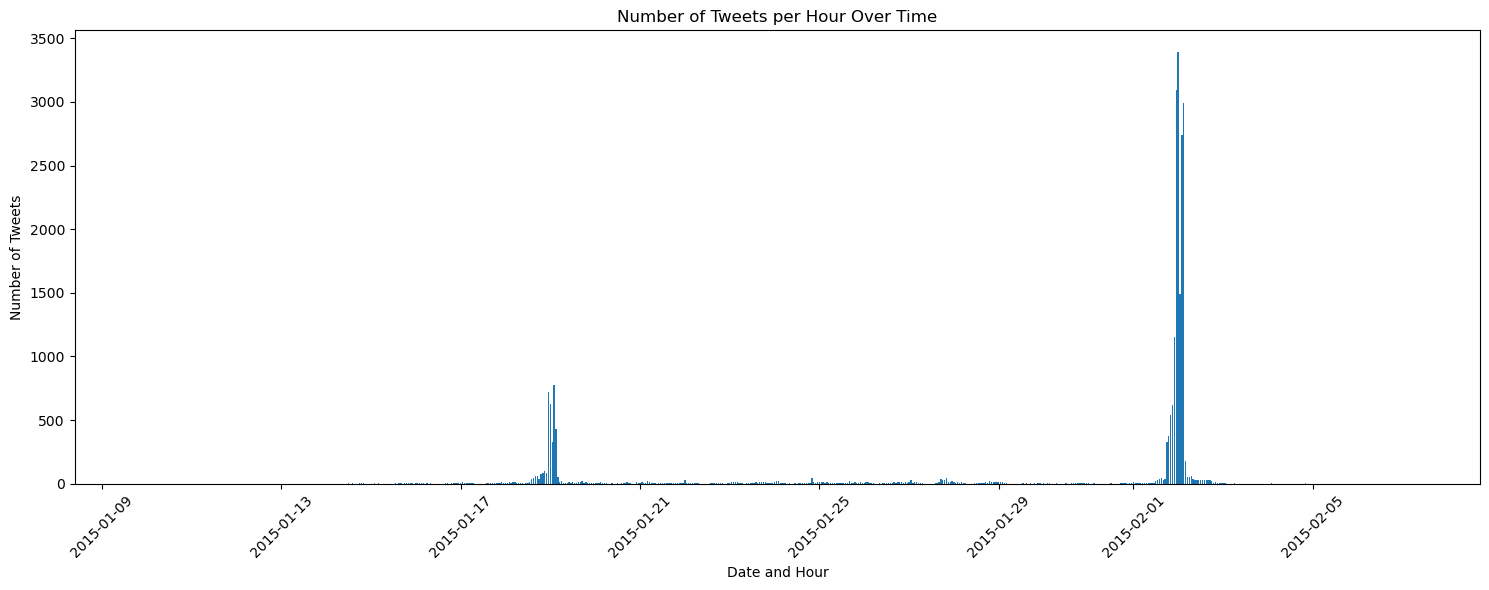

In [8]:
# call process_data and calculate_statistics with each txt file in the data folder
import os
for file in os.listdir('data'):
    if file.endswith('.txt'):
        print('Processing file: ', file)
        df = process_data('data/'+file)
        df = calculate_statistics(df)
